1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

BS = '\033[1m'
BE = '\033[0m'

The probability that in a single year are observed 15 or more hurricances is: 0.084%
Z score: 3.4661629670697414
Since the Z score is larger than 3, I can consider the number 15 as signficantly different.


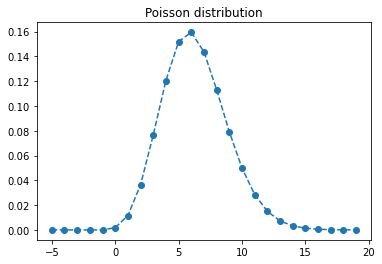

In [2]:
n = 15
mean = 6.3
sigma = math.sqrt(mean)
Z_sign = 3

x = np.arange(-5, 20, 1)
y = stats.poisson.pmf(x, mu=mean)
plt.plot(x, y, "o--")
plt.title("Poisson distribution")

cdf = stats.poisson.cdf(n, mean)
prob = 1-cdf
print("The probability that in a single year are observed 15 or more hurricances is: %.3f%%" % (prob*100))
Z = abs(n - mean) / sigma
print("Z score:", Z)
print("Since the Z score is larger than 3, I can consider the number 15 as signficantly different.")

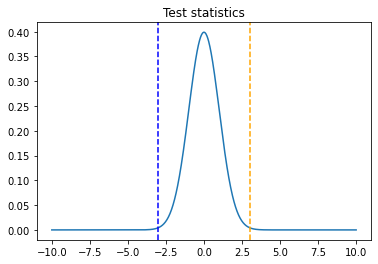

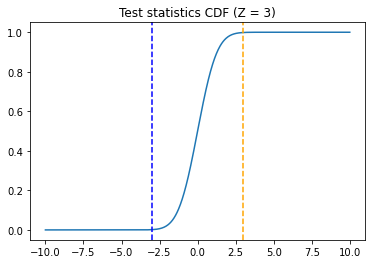

Probability for the given Z = 3 (level of significance): 0.27%


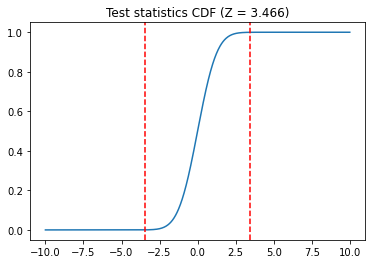

P-value: 0.05%
Since the p-value is smaller than the level of significance we should reject the null hypotesis: therefore, as we stated before, 15 hurricanes is a signficantly different number from the historic average.


In [3]:
#I can calculate also the p-value
#Plot the test statistics and the zeta score
x = np.linspace(-10,10, 1000)
y = stats.norm.pdf(x,0,1)
plt.plot(x, y)
plt.axvline(Z_sign, linestyle='--', color='orange')
plt.axvline(-Z_sign, linestyle='--', color='blue')
plt.fill_between(x, y, where=np.abs(y) > np.abs(Z), color='lightblue')
plt.title("Test statistics")
plt.show()

# Find the probability for the given Z = 3
cs = stats.norm.cdf(x)
plt.plot(x, cs)
plt.axvline(Z_sign, linestyle='--', color='orange')
plt.axvline(-Z_sign, linestyle='--', color='blue')
plt.title("Test statistics CDF (Z = 3)")
plt.show()
prob = stats.norm.cdf(-Z_sign) + 1. - stats.norm.cdf(Z_sign)
print("Probability for the given Z = 3 (level of significance): %.2f%%" % (prob*100) )

#Find the p-value
cs = stats.norm.cdf(x)
plt.plot(x, cs)
plt.axvline(Z, linestyle='--', color='r')
plt.axvline(-Z, linestyle='--', color='r')
plt.title("Test statistics CDF (Z = 3.466)")
plt.show()
pvalue = stats.norm.cdf(-Z) + 1. - stats.norm.cdf(Z)
print("P-value: %.2f%%" % (pvalue*100) )
print("\033[1mSince the p-value is smaller than the level of significance we should reject the null hypotesis: therefore, \
as we stated before, 15 hurricanes is a signficantly different number from the historic average.")



2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = len(pre)

# set the input data
pre_mean = np.mean(pre)
post_mean = np.mean(post)

# calculate the variance and the test statistics
var_pre = np.var(pre, ddof=1)
var_post = np.var(post, ddof=1)
sigma = np.sqrt((var_pre+var_post)/2)
T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))

print("T =", T)


T = -3.786997938137629


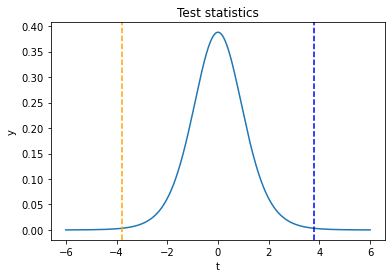

p-value = 0.004302464132864604
Since the p-value is < 0.05, the change in blood pressures was statistically significant.


In [5]:
# plot the test statistics and its pdf
x = np.linspace(-6, +6, 1000)
y = stats.t.pdf(x, n - 1)
plt.plot(x, y)
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("y")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("\033[1mSince the p-value is < 0.05, the change in blood pressures was statistically significant.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

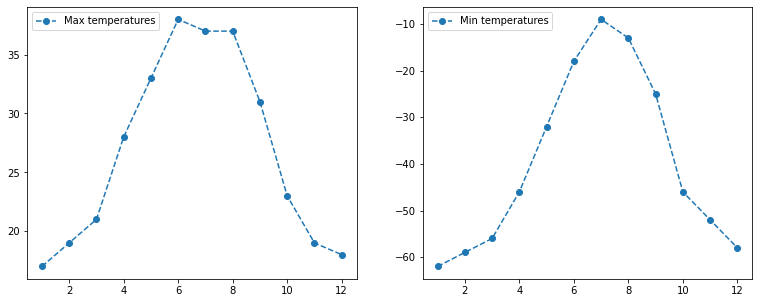

In [6]:
from scipy import optimize
from matplotlib.ticker import  MultipleLocator

t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,sharex='row', figsize=(13,5))
x_t = np.linspace(1, len(t_max), num = len(t_max))

ax1.plot(x_t,t_max,"o--",label = "Max temperatures")
ax1.legend(loc="upper left")

ax2.plot(x_t,t_min,"o--",label = "Min temperatures")
ax2.legend(loc="upper left")

plt.show()

In [7]:
#define fit function
def f(x, A, offset, sigma, c):
    return A * np.exp(-(x-offset)**2/(sigma))+c


#find fit
sol_max, cov_max = optimize.curve_fit(f, x_t, t_max , p0=[1,1,1,1], full_output=False)
sol_min, cov_min = optimize.curve_fit(f, x_t, t_min , p0=[1,7,1,1], full_output=False)

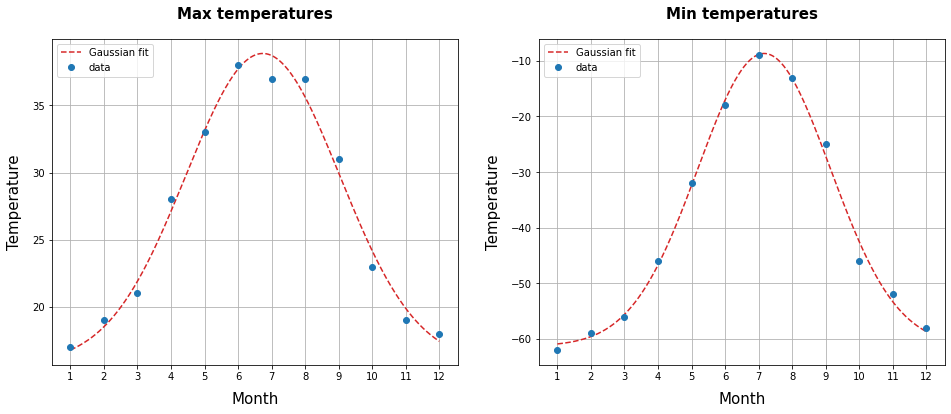

In [8]:
#plot fits

x = np.linspace(1, 12, num=500)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,sharex='row', figsize=(16,6))


ax1.plot(x,f(x,sol_max[0],sol_max[1],sol_max[2],sol_max[3]),"tab:red",linestyle='--',label = 'Gaussian fit')
ax1.plot(x_t,t_max, color = "tab:blue",marker = 'o',linestyle='',label='data')
ax1.legend(loc = 'upper left')
ax1.set_xlabel('Month', size = 15, labelpad  = 10)
ax1.set_ylabel('Temperature', size = 15, labelpad  = 10)
ax1.set_title('Max temperatures',size = 15, fontweight ="bold", pad=20)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.grid()


ax2.plot(x,f(x,sol_min[0],sol_min[1],sol_min[2],sol_min[3]),"tab:red",linestyle='--',label = 'Gaussian fit')
ax2.plot(x_t,t_min,color = "tab:blue",marker = 'o',linestyle='', label='data')
ax2.legend(loc = 'upper left')
ax2.set_xlabel('Month', size = 15, labelpad  = 10)
ax2.set_ylabel('Temperature', size = 15, labelpad  = 10)
ax2.set_title('Min temperatures',size = 15, fontweight ="bold", pad=20)
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.grid()
plt.show()

#the fits are rasonable

In [9]:
print("\nT_max: Offset = %.2f +- %.2f" % (sol_max[1], np.sqrt(cov_max[1,1])))
print("T_min: Offset = %.2f +- %.2f\n" % (sol_min[1], np.sqrt(cov_min[1,1])))
print("\033[1mTherefore the time offset for min and max temperatures is not the same within the fit accuracy.\n")


T_max: Offset = 6.74 +- 0.08
T_min: Offset = 7.16 +- 0.05

Therefore the time offset for min and max temperatures is not the same within the fit accuracy.



4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [10]:
import pickle
import pandas as pd

file_pkl = open('./data/residuals_261.pkl', 'rb')
new_dict = pickle.load(file_pkl)
file_pkl.close()

df = pd.DataFrame(new_dict.tolist())
df = df[abs(df['residuals'])< 2]
df = df.reset_index(drop=True)
residuals = df.drop(columns=['distances'])


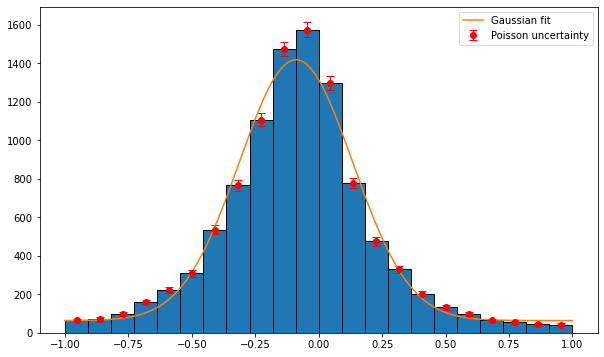

In [11]:
#Define fit function
def f(x, A, offset, sigma, c):
    return c + (A * stats.norm.pdf(x,offset,sigma))

#Plot the histogram
fig = plt.figure(figsize=(10, 6))
left_lim,right_lim = -1, +1
h, bins, _ = plt.hist(residuals,bins=22, edgecolor = "black",range=(left_lim,right_lim))
err = np.sqrt(h)
bin_center = 0.5*(bins[1:] + bins[:-1])

ax = fig.axes[0]
ax.errorbar(bin_center, h, yerr=err, fmt='o', c='red', linewidth=1, capsize=4, label= "Poisson uncertainty")

#Fit by means of curve_fit
sol, cov = optimize.curve_fit(f, bin_center, h ,p0=[1000,1,1,1], full_output=False,absolute_sigma=True, sigma = err)

#Plot the fit
x = np.linspace(left_lim,right_lim, num=500)
ax.plot(x,f(x,sol[0],sol[1],sol[2],sol[3]),label = 'Gaussian fit')
ax.legend()
plt.show()

chi2 = 153.4841488392963


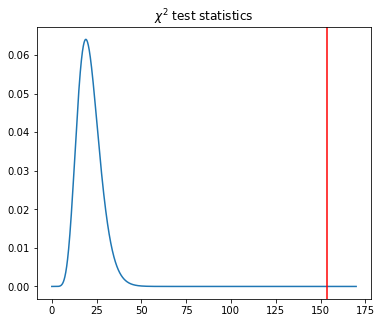


p-value:0.00%
Since the p-value is below 5%, the fit is considered unsatisfactory.



In [12]:
#Calculate the chi^2
y = h
var = err**2
ndof = len(bin_center) - 1
chi2 = np.sum((y - f(bin_center,sol[0],sol[1],sol[2],sol[3]))**2 / var )
print("chi2 =", chi2)

#Plot the test statistics and its pdf
p = np.arange(0, 170, 0.1)
ts = stats.chi2.pdf(p, df=ndof)
fig = plt.figure(figsize=(6, 5))
plt.plot(p, ts)
plt.title("$\chi^2$ test statistics")
plt.axvline(chi2, color='red')
plt.show()

#Calculate the p-value from the chi^2 
p_value = 1. - stats.chi2.cdf(chi2, ndof)
print("\np-value:%.2f%%"% (p_value*100))
print("\033[1mSince the p-value is below 5%, the fit is considered unsatisfactory.")
print()


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

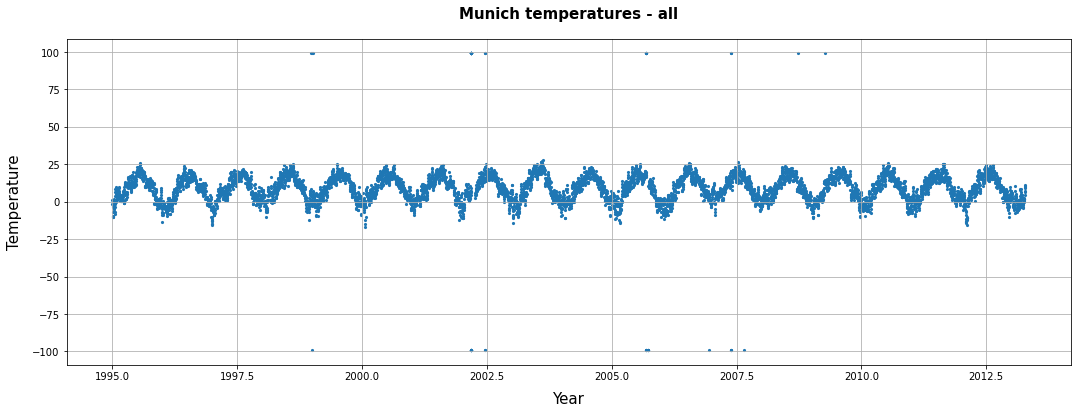

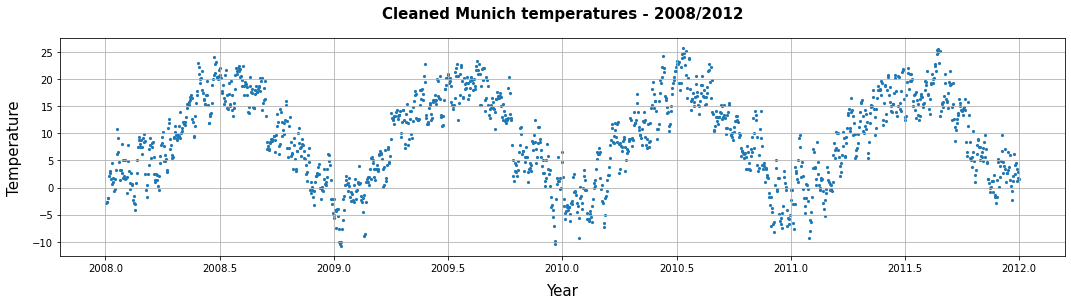

In [13]:
#Read data
data = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', delimiter = ' ', header=None)

fig = plt.figure(figsize=(18, 6))
plt.scatter(data[0], data[1],linewidths = 0, s = 10)
plt.xlabel('Year', size = 15, labelpad  = 10)
plt.ylabel('Temperature', size = 15, labelpad  = 10)
plt.title('Munich temperatures - all',size = 15, fontweight ="bold", pad=20)
plt.grid()
plt.show()

#clean data
clean = data[(data[1] > -50) & (data[1] < 50)]
clean = clean[(clean.iloc[:,0] >=2008) & (clean.iloc[:,0] <=2012)]
print()

#replot data
fig = plt.figure(figsize=(18, 4))
plt.scatter(clean[0], clean[1],linewidths = 0,s = 10)
plt.xlabel('Year', size = 15, labelpad  = 10)
plt.ylabel('Temperature', size = 15, labelpad  = 10)
plt.title('Cleaned Munich temperatures - 2008/2012' ,size = 15, fontweight ="bold", pad=20)
plt.grid()
plt.show()

Best-fit values of the parameters:
a = -9.96 +- 0.13
b = 12.33 +- 0.01
c = 9.2628 +- 0.09


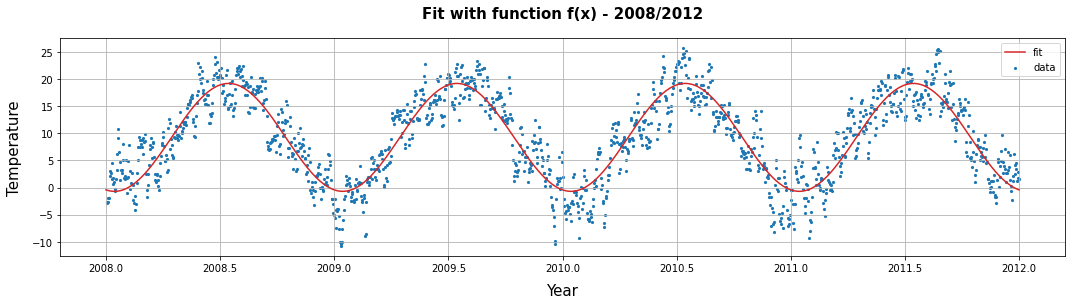

In [14]:
#Perform the first fit and find the best-fit values of the parameters

def f(t,A,b,c):
    return A*np.cos(2*np.pi*np.array(t)+b )+c

sol, cov = optimize.curve_fit(f, clean[0], clean[1] ,p0=[1,1,1], full_output=False)
print("Best-fit values of the parameters:")
print("a = %.2f +- %.2f" % (sol[0], np.sqrt(cov[0,0])))
print("b = %.2f +- %.2f" % (sol[1], np.sqrt(cov[1,1])))
print("c = %.4f +- %.2f" % (sol[2], np.sqrt(cov[2,2])))

#Plot fit
x = np.linspace(2008,2012, num=500)

fig = plt.figure(figsize=(18, 4))
plt.scatter(clean[0], clean[1],linewidths = 0,s = 10,label = "data")
plt.plot(x,f(x,sol[0],sol[1],sol[2]),"tab:red",label = "fit")
plt.xlabel('Year', size = 15, labelpad  = 10)
plt.ylabel('Temperature', size = 15, labelpad  = 10)
plt.title('Fit with function f(x) - 2008/2012',size = 15, fontweight ="bold", pad=20)
plt.legend()
plt.grid()
plt.show()

In [18]:
#Find average temperature in Munich 
def f_neg(t,A,b,c):
    return -(A*np.cos(2*np.pi*np.array(t)+b )+c)

mean = clean.mean()
print( "\033[1mAccording to the data\033[0m, the overall average temperature in Munich in the range 2008 to 2012 is:\033[1m %.2f "
      % (mean[1]))
print( "\033[1mAccording to the fitted fuction\033[0m, the overall average temperature in Munich in the range 2008 to 2012 is:\033[1m %.2f "
      % (sol[2]))

#Find min and max temperature
sol_min = optimize.minimize_scalar(f, args =(sol[0],sol[1],sol[2]) , method='Brent')
sol_max = optimize.minimize_scalar(f_neg, args =(sol[0],sol[1],sol[2]) , method='Brent')

print("\n\033[0mThe typical daily average values predicted by the model for the coldest and hottest time of year are:\033[1m %.2f and %.2f" 
      %(-sol_max['fun'],sol_min['fun']))

# b represent a phase shift in the cosine function, that is used to make the fitted function align
# with the correct period of the year, therefore it can be seen as a time offset
print("\nThe parameter b represent a phase shift in the cosine function, that is used to make the fitted function align \
with the correct period of the year, therefore it can be seen as a time offset.")

According to the data, the overall average temperature in Munich in the range 2008 to 2012 is: 9.26 
According to the fitted fuction, the overall average temperature in Munich in the range 2008 to 2012 is: 9.26 

The typical daily average values predicted by the model for the coldest and hottest time of year are: 19.22 and -0.70

The parameter b represent a phase shift in the cosine function, that is used to make the fitted function align with the correct period of the year, therefore it can be seen as a time offset.


In [16]:
#Perfrom the second fit
def g(t,a,b,c,d):
    return a*np.cos(2*np.pi* b *np.array(t)+ c) + d

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2)) #calculate test statics
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2) #calculate p value
    if verbose: print("\np-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

#Find the RSS
f_sol, f_cov = optimize.curve_fit(f, clean[0], clean[1] ,p0=[1,1,1], full_output=False)
y = f(clean[0],f_sol[0],f_sol[1],f_sol[2])
RSS_f = np.sum((y - clean[1])**2)
ndof_f = 3 - 1 # n of parameters 
print("\033[1mRSS_f: ", RSS_f )

g_sol, g_cov = optimize.curve_fit(g, clean[0], clean[1] ,p0=[1,1,1,1], full_output=False)
y = g(clean[0],g_sol[0],g_sol[1],g_sol[2],g_sol[3])
RSS_g = np.sum((y - clean[1])**2)
ndof_g = 4 - 1 # n of parameters 
print("RSS_g: ", RSS_g )

#Perform the Fisher F-test
alpha = 0.05
N = len(clean[0])
test = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, N, verbose=True)

RSS_f:  18669.515394578364
RSS_g:  18669.225430956096

p-value: 0.880 , additional parameter necessary: NO
